# Load packages

In [1]:
import sklearn.metrics as sk
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
hotspot=pd.read_csv('../../figures/tables/hotspot_msbrain_ms1.csv')
spatialDE=pd.read_csv('../../figures/tables/spatialDE_scores.csv')
giotto=pd.read_csv('../../figures/tables/giotto_kmtest_svg_msbrain1.csv')
moranI=pd.read_csv('../../figures/tables/moranI_3reps.csv')
geary_c=pd.read_csv('../../figures/tables/gearyC_3reps.csv')
somde=pd.read_csv('../../figures/tables/somde_svg_msbrain_output.csv')

In [3]:
spatialde_merge=pd.DataFrame(list(spatialDE['pval']),index=spatialDE['index'],columns=['pval_spatialde'])
giotto_merge=pd.DataFrame(list(giotto['p.value']),index=giotto.genes,columns=['pval_giotto'])
hotspot_merge=pd.DataFrame(list(hotspot['Pval']),index=hotspot.Gene,columns=['pval_hotspot'])
morani_merge=moranI.loc[:,['pval_norm','I']]
morani_merge.index=moranI['Unnamed: 0']
morani_merge.columns=['pval_I','I']
gearyc_merge=geary_c.loc[:,['pval_norm','C']]
gearyc_merge.index=geary_c['Unnamed: 0']
gearyc_merge.columns=['pval_C','C']
somde_merge=pd.DataFrame(list(somde['pval']),index=somde.g,columns=['pval_somde'])



In [4]:
spatialde_merge['rank_spatialde']=list(np.argsort(spatialde_merge.iloc[:,0]))
giotto_merge['rank_giotto']=list(np.argsort(giotto_merge.iloc[:,0]))
hotspot_merge['rank_hotspot']=list(np.argsort(hotspot_merge.iloc[:,0]))
morani_merge['rank_moranI']=list(np.argsort(morani_merge.iloc[:,0]))
gearyc_merge['rank_gearyC']=list(np.argsort(gearyc_merge.iloc[:,0]))
somde_merge['rank_somde']=list(np.argsort(somde_merge.iloc[:,0]))

In [5]:
m1_merge=pd.merge(spatialde_merge,giotto_merge,left_index=True,right_index=True)
m2_merge=pd.merge(m1_merge,hotspot_merge,left_index=True,right_index=True)
m3_merge=pd.merge(m2_merge,morani_merge,left_index=True,right_index=True)
m4_merge=pd.merge(m3_merge,gearyc_merge,left_index=True,right_index=True)
m5_merge=pd.merge(m4_merge,somde_merge,left_index=True,right_index=True)

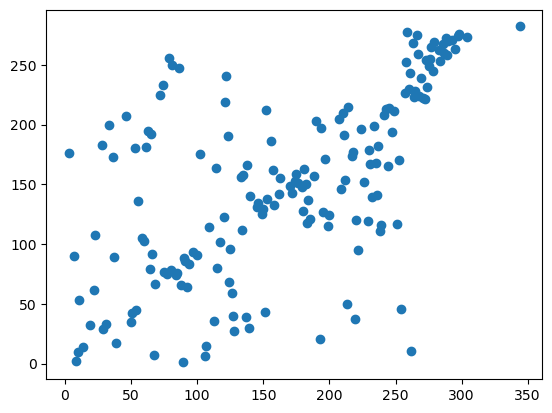

In [6]:
import matplotlib.pyplot as plt
plt.scatter(m5_merge['rank_somde'],m5_merge['rank_hotspot'])
#plt.yscale("log")
#plt.xscale("log")

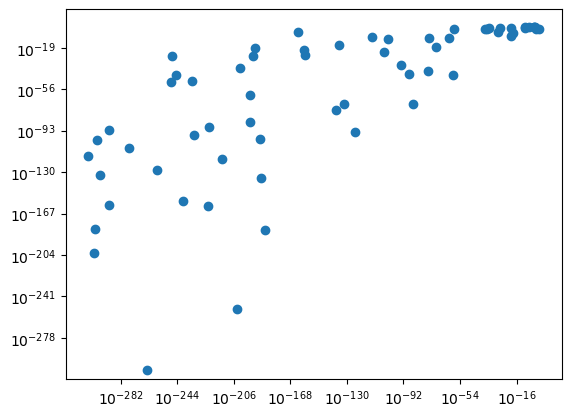

In [7]:
import matplotlib.pyplot as plt
plt.scatter(m2_merge['pval_hotspot'],m2_merge['pval_giotto'])
plt.yscale("log")
plt.xscale("log")

In [8]:
from scipy.stats import spearmanr

In [9]:
selected=['rank_spatialde', 'rank_giotto','rank_hotspot','rank_moranI','rank_gearyC','rank_somde']

In [10]:
output_corr=pd.DataFrame(index=selected,columns=selected)

In [15]:
m5_merg

,rank_spatialde,rank_giotto,rank_hotspot,rank_moranI,rank_gearyC,rank_somde
rank_spatialde,1.0,-0.086819,-0.193018,-0.085542,-0.102104,-0.126106
rank_giotto,-0.086819,1.0,0.531479,-0.298304,0.344549,0.361225
rank_hotspot,-0.193018,0.531479,1.0,0.090638,0.618541,0.631161
rank_moranI,-0.085542,-0.298304,0.090638,1.0,0.156491,0.038553
rank_gearyC,-0.102104,0.344549,0.618541,0.156491,1.0,0.520829
rank_somde,-0.126106,0.361225,0.631161,0.038553,0.520829,1.0


In [12]:
for c in output_corr.index:
    for r in output_corr.columns:
        ous, p = spearmanr(m5_merge.loc[:,c],m5_merge.loc[:,r])
        output_corr.loc[c,r]=ous

<Figure size 400x400 with 0 Axes>

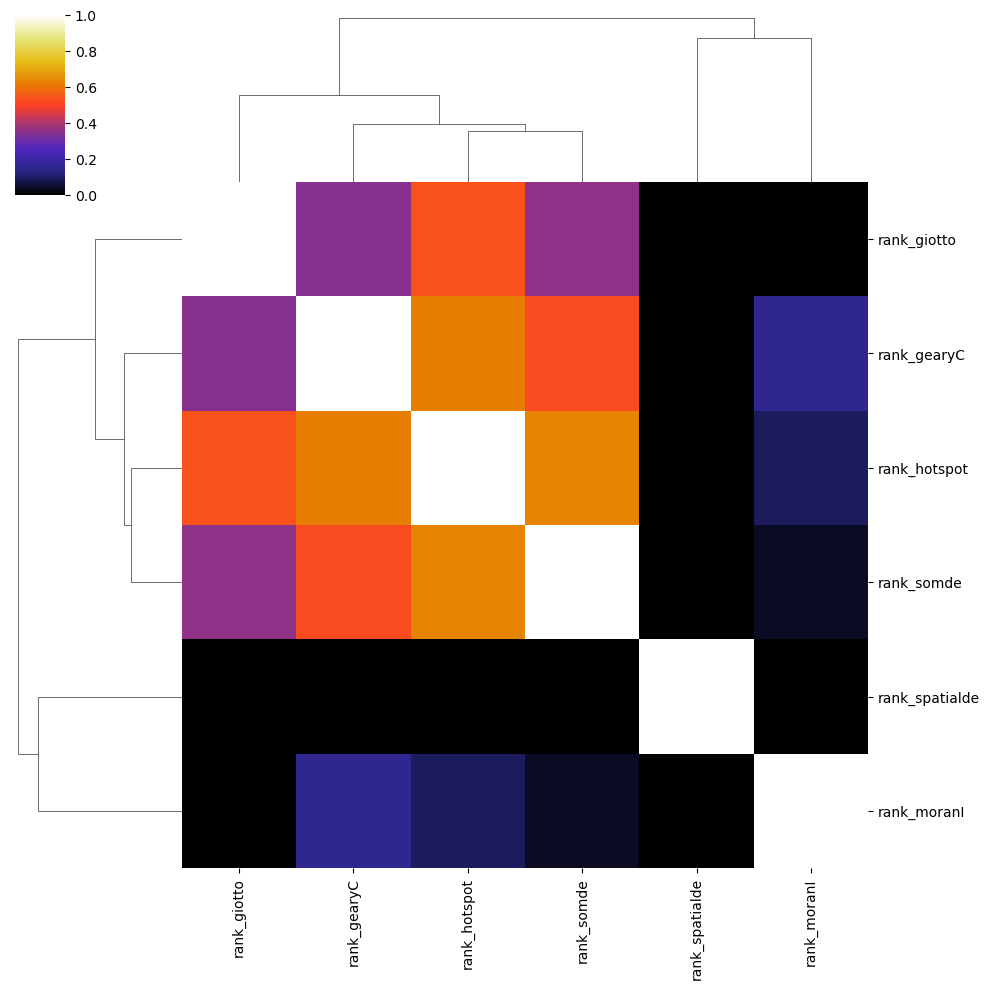

In [13]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.clustermap(output_corr.astype(float),vmax=1,vmin=0,cmap='CMRmap')

In [233]:
m4_merge['top30']=list(np.sum(m4_merge.loc[:,output_corr.index]<100,axis=1))

In [234]:
m4_merge.groupby('top30').count()

,pval_spatialde,rank_spatialde,pval_giotto,rank_giotto,pval_hotspot,rank_hotspot,pval_I,I,rank_moranI,pval_C,C,rank_gearyC,std_methods,top10,top40
top30,,,,,,,,,,,,,,,
0,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
1,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
2,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
3,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
4,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [212]:
m4_merge['std_methods']=list(np.std(m4_merge.loc[:,output_corr.index],axis=1))

In [218]:
m4_merge.sort_values(by='std_methods')

,pval_spatialde,rank_spatialde,pval_giotto,rank_giotto,pval_hotspot,rank_hotspot,pval_I,I,rank_moranI,pval_C,C,rank_gearyC,std_methods
Fn1,2.082180e-02,112,3.013800e-322,77,0.0,76,0.0,0.108739,115,0.0,0.889260,66,20.232647
Nell1,0.000000e+00,166,3.013800e-322,181,0.0,133,0.0,0.427175,154,0.0,0.583300,112,24.342555
Mecom,5.714861e-04,36,3.013800e-322,90,0.0,66,0.0,0.121860,111,0.0,0.870826,67,25.226970
Ly6a,2.242585e-01,47,3.013800e-322,81,0.0,74,0.0,0.102669,121,0.0,0.893324,53,26.156452
Cd44,4.272527e-03,89,1.220268e-236,61,0.0,80,0.0,0.097701,122,0.0,0.906062,41,27.266096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gpr101,2.732044e-01,264,1.552077e-315,223,0.0,62,0.0,0.139094,27,0.0,0.867368,63,96.231803
Garnl3,0.000000e+00,275,3.013800e-322,8,0.0,30,0.0,0.383003,165,0.0,0.615058,140,96.983710
Rab3b,1.277042e-10,274,3.013800e-322,46,0.0,191,0.0,0.258168,243,0.0,0.733948,29,100.940775
Pcsk5,9.591050e-11,276,3.013800e-322,11,0.0,17,0.0,0.201353,60,0.0,0.793258,11,102.158700


In [214]:
m4_merge

,pval_spatialde,rank_spatialde,pval_giotto,rank_giotto,pval_hotspot,rank_hotspot,pval_I,I,rank_moranI,pval_C,C,rank_gearyC,std_methods
Cbln1,0.005709,122,2.930610e-307,211,0.000000e+00,79,0.0,0.104967,118,0.000000e+00,0.918680,48,54.876589
Ccl3,0.000000,123,8.623436e-18,272,7.894626e-11,277,0.0,0.025326,89,6.547060e-59,0.968690,164,76.855709
Ccn2,0.087882,125,3.013800e-322,17,0.000000e+00,88,0.0,0.201481,62,0.000000e+00,0.771622,2,45.207964
Cd300c2,0.004001,127,2.520696e-55,254,1.854194e-35,270,0.0,0.022688,96,4.116259e-48,0.971822,167,68.659741
Chodl,0.000000,129,1.583218e-34,78,4.528983e-59,267,0.0,0.032553,102,5.444000e-36,0.975811,169,66.293288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slfn5,0.023015,16,7.018929e-236,257,1.211783e-195,243,0.0,0.067191,86,1.114257e-228,0.937415,150,91.814160
Sox11,0.000022,8,3.013800e-322,79,0.000000e+00,89,0.0,0.176192,10,0.000000e+00,0.820938,14,36.116478
Sox17,0.224370,211,1.034882e-89,265,7.696604e-89,260,0.0,0.041662,71,2.113895e-117,0.955377,158,72.257872
Sst,0.051460,226,3.013800e-322,133,0.000000e+00,93,0.0,0.122927,110,0.000000e+00,0.875711,68,54.328630


In [219]:
selected=['pval_spatialde', 'pval_giotto','pval_hotspot','pval_I']

In [220]:
m4_merge_pvals=m4_merge.loc[:,selected]

In [221]:
np.sum(m4_merge_pvals<0.005,axis=0)

pval_spatialde    134
pval_giotto       173
pval_hotspot      173
pval_I            173
dtype: int64